# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [390]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [205]:
import sklearn
sklearn.__version__

'0.20.3'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.


In [353]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

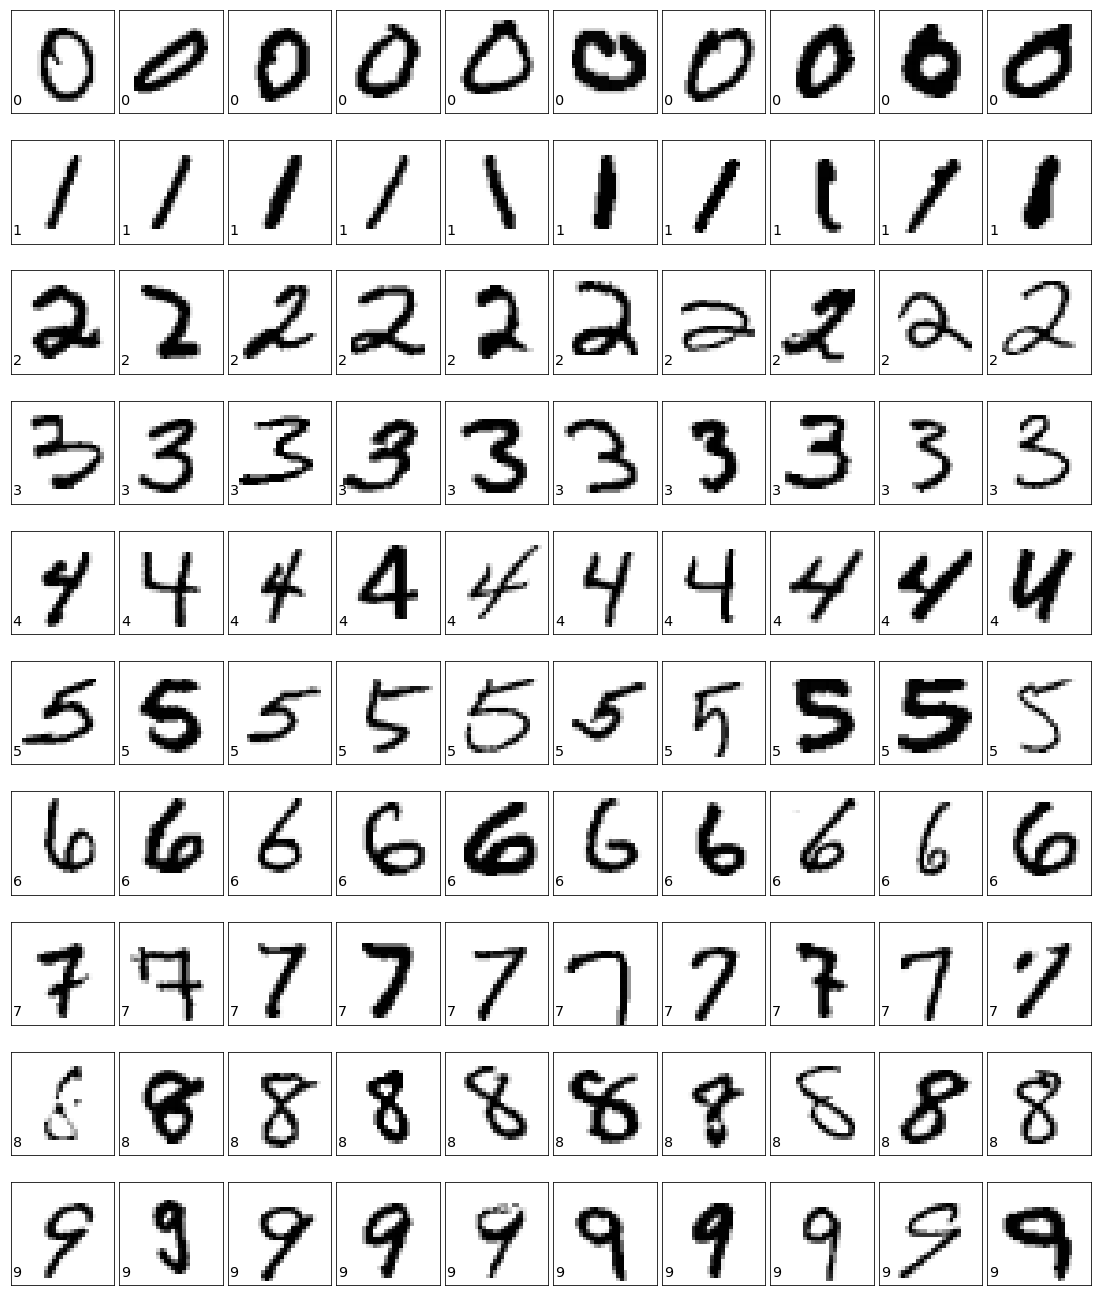

In [355]:
def P1(num_examples=10):

### STUDENT START ###

#set the overall canvas for all of our subplots
    fig = plt.figure(figsize = (15, 18))
#set plot features for each subplot, particularly the spacing between the plots with hspace and wspace, and then 
#where we want to set the corners for each subplot.
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#we want 100 subplots, 10 f or each digit, with no axis labeling. 
    for i in range(100):
        axes = fig.add_subplot(10,num_examples, i+1, xticks=[], yticks=[])
    #Use imshow to translate the numbers for each pixel into a grayscale value
        axes.imshow(examples[str(i // 10)][i % 10].reshape(28,28), cmap='gray_r')
    #Add the text of the digit  at the bottom left of each subplot for additional clarity
        axes.text(0, 25, str(i // 10), color='black', fontsize = 'x-large')

###STUDENT END ###
examples = {str(i) : X[Y==str(i)][:10] for i in range(10)}
P1(10)

### Part 2:

Produce k-Nearest Neighbors models with k $\in$ [1,3,5,7,9].  Evaluate and show the accuracy of each model. For the 1-Nearest Neighbor model, additionally show the precision, recall, and F1 for each label. Which digit is the most difficult for the 1-Nearest Neighbor model to recognize?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [356]:
def P2(k_values):

### STUDENT START ###


    for k in k_values:
        #choose our nearest neighbors model with size k
        model = KNeighborsClassifier(n_neighbors  = k)
        #fit our model and predict against dev data
        model.fit(mini_train_data, mini_train_labels)
        predicted_labels = model.predict(dev_data)
        #find the number of incorrectly predicted classes
        wrong_prediction = (predicted_labels != dev_labels)
        print (f"For {k}-Nearest Neighbor:\n", 'The number of incorrect predictions:', np.sum(wrong_prediction),"\n",
               'Accuracy Percentage is:', "{:.1%}".format(model.score(dev_data, dev_labels)))
        if k ==1:
               print(sklearn.metrics.classification_report(y_true = dev_labels, y_pred = predicted_labels))
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For 1-Nearest Neighbor:
 The number of incorrect predictions: 111 
 Accuracy Percentage is: 88.9%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        90
           1       0.83      0.99      0.90       110
           2       0.98      0.87      0.92       101
           3       0.89      0.85      0.87       110
           4       0.95      0.85      0.90       107
           5       0.86      0.82      0.84        82
           6       0.89      0.96      0.92        89
           7       0.89      0.92      0.90       110
           8       0.93      0.78      0.85       106
           9       0.79      0.89      0.84        95

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

For 3-Nearest Neighbor:
 The number of incorrect predictions: 134 
 Accuracy Percentage is: 86.6%
For 5-Nearest Neighbor:
 The number of incorr

ANSWER: For 1-Nearest Neighbor, the results are very interesting per the report above. It looks like Digit 9 was the most difficult to recognize. Of those digits that were actually 9s, the model predicted accurately 79% of them (precision). The recall percentage was higher at 89%. This indicates that there were many false positives of 9s being classified, when in reality, they were other digits. The f1-score uses a harmonic average for precision and recall and the digit 9 has the lowest score of 0.84. The digit 5 had a relatively high accuracy of of 86%, but a low recall of 82%, indicating that there were false negatives (true 5s that were classified as other digits). The f1-score for digit 5 is also at 0.84, and therefore, it appears that the 1-nearest neighbor model struggled with 5s and 9s the most.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on subsets of the train set.  For each subset, take just the first part of the train set without re-ordering.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [358]:
def P3(train_sizes, accuracies):

### STUDENT START ###


    for i in train_sizes:
        sub1, lab1 = train_data[:i], train_labels[:i]
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(sub1, lab1)
        start = time.time()
        predicted_labels = model.predict(dev_data)
        #find the number of incorrectly predicted classes
        end = time.time()
        wrong_prediction = (predicted_labels != dev_labels)
        accuracies.append(model.score(dev_data, dev_labels))
        print (f"For training set of {i}", 'The number of incorrect predictions:', np.sum(wrong_prediction),"\n",
               'Accuracy Percentage is:', "{:.1%}".format(model.score(dev_data, dev_labels)),"\n",
              f"The time needed to measure the performance of this model: {round(end - start,2)} seconds")    

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

For training set of 100 The number of incorrect predictions: 297 
 Accuracy Percentage is: 70.3% 
 The time needed to measure the performance of this model: 0.22 seconds
For training set of 200 The number of incorrect predictions: 235 
 Accuracy Percentage is: 76.5% 
 The time needed to measure the performance of this model: 0.41 seconds
For training set of 400 The number of incorrect predictions: 183 
 Accuracy Percentage is: 81.7% 
 The time needed to measure the performance of this model: 0.74 seconds
For training set of 800 The number of incorrect predictions: 126 
 Accuracy Percentage is: 87.4% 
 The time needed to measure the performance of this model: 1.82 seconds
For training set of 1600 The number of incorrect predictions: 96 
 Accuracy Percentage is: 90.4% 
 The time needed to measure the performance of this model: 3.74 seconds
For training set of 3200 The number of incorrect predictions: 73 
 Accuracy Percentage is: 92.7% 
 The time needed to measure the performance of this 

### Part 4:

Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data.  What's wrong with using linear regression here?

Apply a transformation to the predictor features and a transformation to the outcome that make the predictions more reasonable.  Show $R^2$ of the improved linear regression model.  Show the accuracies predicted for training set sizes 60000, 120000, and 1000000.  Show a lineplot of actual accuracies and predicted accuracies vs. training set size over the range of training set sizes in the training data - be sure to display accuracies and training set sizes in appropriate units.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hint re: predictor feature transform: Accuracy increases with training set size logarithmically.
* Hint re: outcome transform: When y is a number in range 0 to 1, then odds(y)=y/(1-y) is a number in range 0 to infinity.

R-squared of unadjusted model:  40.5%
Accuracy of unadjusted model with training size of  60000 : 123.9%
Accuracy of unadjusted model with training size of  120000 : 164.6%
Accuracy of unadjusted model with training size of  1000000 : 760.7%


R-squared of model2 (adjusted model):  95.0%


Accuracy of model2 (adjusted model) with training size of  60000 : 96.3%
Accuracy of model2 (adjusted model) with training size of  120000 : 96.6%
Accuracy of model2 (adjusted model) with training size of  1000000 : 97.4%


For small training sizes, our adjusted model does not do a good job of predicting accuracies, as can be seen below


Training size of 50. Predicted Accuracy:
149.2%


Training size of 105. Predicted Accuracy:
-0.9%


Training size of 106. Predicted Accuracy:
2.9%


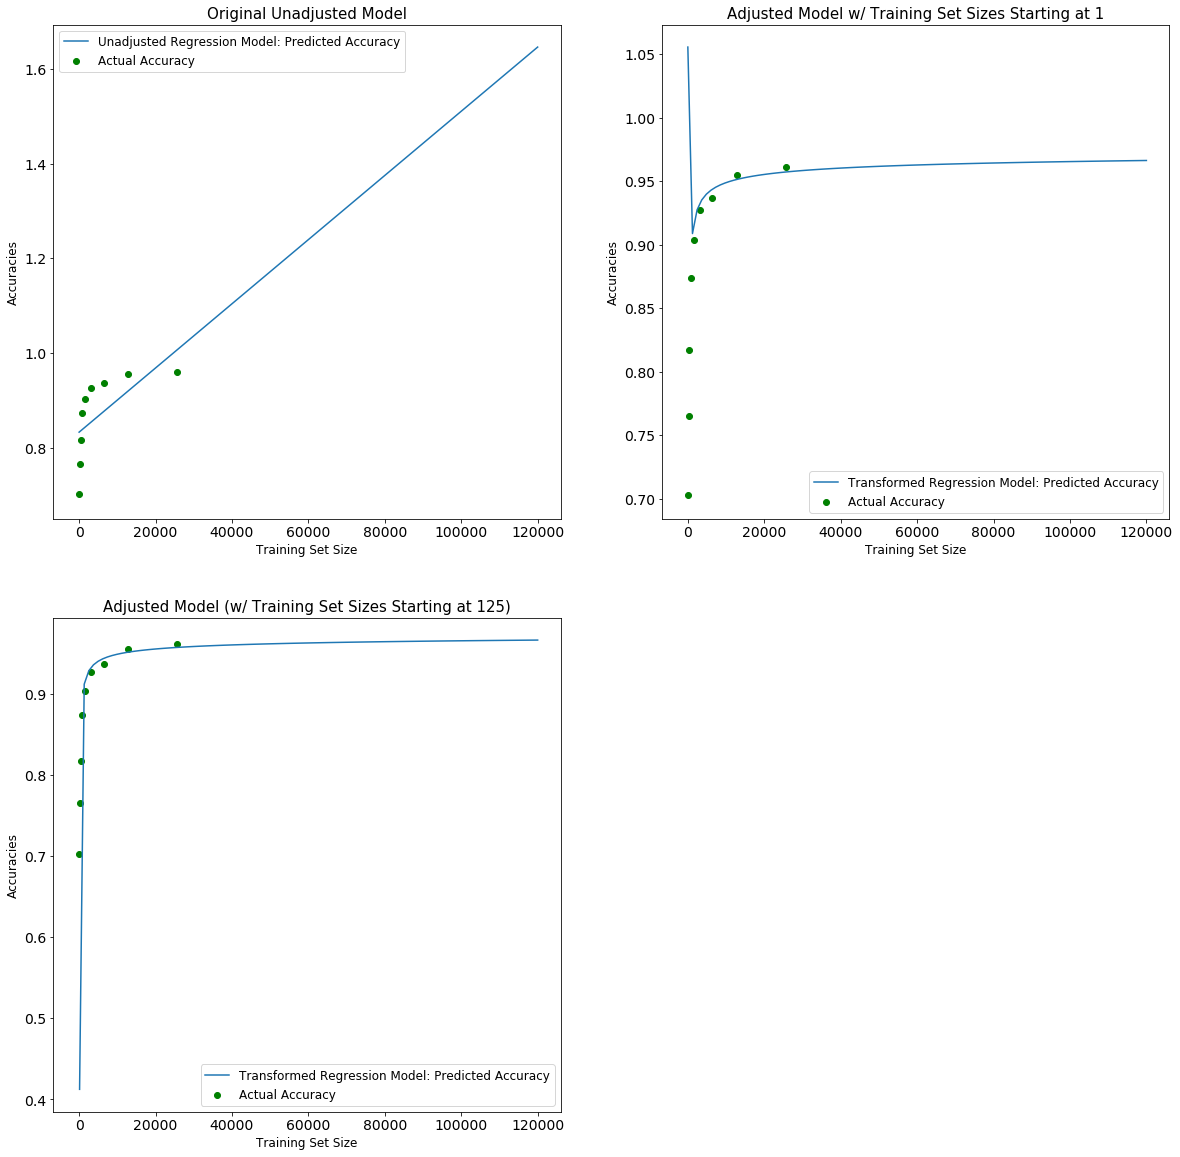

In [383]:
def P4():

    ### STUDENT START ###
    model = LinearRegression()
    train_sizes2 = [60000,120000,1000000]
    model = LinearRegression()

    #training our model with the training sizes, and the accuracy as the output
    model.fit(X = np.array(train_sizes)[:,np.newaxis], y = np.array(accuracies)[:,np.newaxis] )

    print("R-squared of unadjusted model: ", '{:.1%}'.format(model.score(X = np.array(train_sizes)[:,np.newaxis], y = np.array(accuracies)[:,np.newaxis])))


    for i in train_sizes2:
        print("Accuracy of unadjusted model with training size of ",i,":", '{:.1%}'.format(float(model.predict(np.array([i]).reshape(-1,1)))))

    #transforming the predictors(the size of training sets) with log, and transforming accuracies with 1/(1-accuracy)
    logtrainsizes =np.log(np.array(train_sizes))
    transformed_accuracies = np.array(accuracies) /(1 - np.array(accuracies))

    #creating another regression model on the transformed predictors and outcome
    model2 = LinearRegression()
    model2.fit(X=logtrainsizes[:,np.newaxis], y = transformed_accuracies[:,np.newaxis])
    print("\n")
    print("R-squared of model2 (adjusted model): ", '{:.1%}'.format(model2.score(X = np.array(logtrainsizes)[:,np.newaxis], 
                                                               y = np.array(transformed_accuracies)[:,np.newaxis])))
    print("\n")

    for i in train_sizes2:
        print("Accuracy of model2 (adjusted model) with training size of ",i,":", 
    '{:.1%}'.format(float(model2.predict(np.array([np.log(i)]).reshape(-1,1)))/float(model2.predict(np.array([np.log(i)]).reshape(-1,1))+1)))

    #plotting the regression of predicted accuracies versus actual accuracies (unadjusted model)
    plt.figure(figsize=(20,20))
    axes = plt.subplot(2, 2, 1)
    x = np.linspace(0, 120000, 100)[:,np.newaxis]
    plt.plot(x, model.predict(x), label = 'Unadjusted Regression Model: Predicted Accuracy')
    plt.scatter(x = train_sizes, y=accuracies, color='green', label = 'Actual Accuracy')

    plt.ylabel("Accuracies", fontsize=12)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.title('Original Unadjusted Model', fontsize=15)
    plt.legend(loc="upper left", fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    #plotting the regression of predicted accuracies, with our adjusted model, versus actual accuracies
    axes = plt.subplot(2, 2, 2)
    x = np.linspace(1, 120000, 100)[:,np.newaxis]
    #For plotting purposes we need to un-transform y, to convert back into probabilities we can interpret. We do that by backsolving
    #for the accuracy, which would be equal to the transformed predicted value/(transformed predicted value + 1)

    plt.plot(x, model2.predict(np.log(x))/(model2.predict(np.log(x))+1), label = 'Transformed Regression Model: Predicted Accuracy')
    plt.scatter(x = train_sizes, y=accuracies, color='green', label = 'Actual Accuracy')

    plt.ylabel("Accuracies", fontsize=12)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.title('Adjusted Model w/ Training Set Sizes Starting at 1', fontsize=15)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    
    
    #plotting regression of predicted accuracies with our adjusted model, starting with training sets larger than 125 to avoid graph skewing

    axes = plt.subplot(2, 2, 3)
    x = np.linspace(125, 120000, 100)[:,np.newaxis]
    #For plotting purposes we need to un-transform y, to convert back into probabilities we can interpret. We do that by backsolving
    #for the accuracy, which would be equal to the transformed predicted value/(transformed predicted value + 1)

    plt.plot(x, model2.predict(np.log(x))/(model2.predict(np.log(x))+1), label = 'Transformed Regression Model: Predicted Accuracy')
    plt.scatter(x = train_sizes, y=accuracies, color='green', label = 'Actual Accuracy')

    plt.ylabel("Accuracies", fontsize=12)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.title('Adjusted Model (w/ Training Set Sizes Starting at 125)', fontsize=15)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    
    
    
    print("\n")
    print("For small training sizes, our adjusted model does not do a good job of predicting accuracies, as can be seen below")
    print("\n")
    
    print("Training size of 50. Predicted Accuracy:")
    print('{:.1%}'.format(float(model2.predict(np.array(np.log(50)).reshape(-1,1)))/(float(model2.predict(np.array(np.log(50)).reshape(-1,1)))+1)))
    print("\n")
    
    print("Training size of 105. Predicted Accuracy:")
    print('{:.1%}'.format(float(model2.predict(np.array(np.log(105)).reshape(-1,1)))/(float(model2.predict(np.array(np.log(105)).reshape(-1,1)))+1)))

    print("\n")
    print("Training size of 106. Predicted Accuracy:")
    print('{:.1%}'.format(float(model2.predict(np.array(np.log(106)).reshape(-1,1)))/(float(model2.predict(np.array(np.log(106)).reshape(-1,1)))+1)))

### STUDENT END ###

P4()

ANSWER: The R-squared of our linear regression model is relatively low at 40.5% and the accuracy of our model for training sets greater than 60,000 is over 100%, which is impossible. The model does not extrapolate well and is limited by the data that is included in the training set. Since our training set is limited to a max size of 25,600, using a linear regression model to estimate the accuracy of a 1 Nearest Neighbors model with a training set more than 25,600 is not accurate and for this reason it overestimates the predicted accuracy. 

With our adjusted model, the R-squared value has increased to 95.0%, meaning our model explains the variation in the y-values better than the original model. However, the new adjusted model, although it approaches a predicted accuracy of 100% for extremely large training sets, for small training sets it predicts invalid or impossible accuracies, which can be seen in the second graph and explained in the commentary above the graphs. For example, a training set of 50 results in an accuracy of 149.2%, which is impossible. A training set of 105, results in a predicted accuracy of -0.9%, which is also impossible. However, this model appears to predict the pattern of accuracy much better than our approach in model 1 and since we would assume that our training sets would be greater than size 105, this model is much better approach for estimating accuracies of larger training sets. The third graph shows our adjusted model, starting with training sizes greater than 125 for a better picture of what our adjusted model looks like for larger training sets.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.



The Confusion Matrix is printed below, with actual digits in the rows, and predicted digits in the columns 

[[ 87   0   0   0   0   1   1   0   1   0]
 [  0 109   0   0   0   0   0   0   0   1]
 [  2   3  88   1   0   0   1   5   1   0]
 [  1   1   2  93   0   3   1   2   2   5]
 [  0   5   0   0  91   0   1   1   0   9]
 [  4   1   0   5   0  67   3   0   2   0]
 [  1   2   0   0   0   1  85   0   0   0]
 [  0   5   0   1   0   0   0 101   0   3]
 [  0   5   0   4   1   5   3   1  83   4]
 [  1   0   0   0   4   1   0   4   0  85]]

 The first row of digits below represents True 4s, which were misclassified as 9s (there were a total of 9). 
 The second row of digits below represents True 9s, which were misclassified as 4s (there were a total of 4)


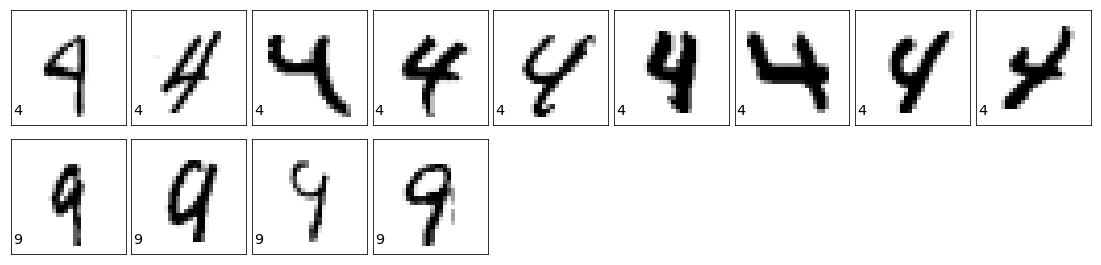

In [364]:
def P5():

### STUDENT START ###
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    print("\n")
    print("The Confusion Matrix is printed below, with actual digits in the rows, and predicted digits in the columns", "\n")
    print(confusion_matrix(dev_labels, test_predicted_labels, labels = np.array(['0','1','2','3','4','5','6','7','8','9'])))
            #find the number of incorrectly predicted classes

    #The model appears to confuse 4s and 9s the most, with eleven 'true' 4s incorrectly classified as 9s and 3 'true' 9s, incorrectly
    #classified as 4s for a total of 14 misclassifications.


    true4sas9s = dev_data[(dev_labels=='4') & (test_predicted_labels=='9')]
    true9sas4s = dev_data[(dev_labels=='9') & (test_predicted_labels=='4')]
    fig = plt.figure(figsize = (15, 7))

    #set plot features for each subplot, particularly the spacing between the plots with hspace and wspace, and then 
    #where we want to set the corners for each subplot.
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    print("\n","The first row of digits below represents True 4s, which were misclassified as 9s (there were a total of 9).", "\n",
         "The second row of digits below represents True 9s, which were misclassified as 4s (there were a total of 4)")
    for i in range(9):
        axes = fig.add_subplot(2,9, i+1, xticks=[], yticks=[])
        #Use imshow to translate the numbers for each pixel into a grayscale value
        axes.imshow(true4sas9s[i].reshape(28,28), cmap='gray_r')
        #Add the text of the digit  at the bottom left of each subplot for additional clarity
        axes.text(0, 25, str(4), color='black', fontsize = 'x-large')

    
    #set plot features for each subplot, particularly the spacing between the plots with hspace and wspace, and then 
    #where we want to set the corners for each subplot.
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


    for i in range(4):
        axes = fig.add_subplot(1,9, i+1, xticks=[], yticks=[])
        #Use imshow to translate the numbers for each pixel into a grayscale value
        axes.imshow(true9sas4s[i].reshape(28,28), cmap='gray_r')
        #Add the text of the digit  at the bottom left of each subplot for additional clarity
        axes.text(0, 25, str(9), color='black', fontsize = 'x-large')

        #set plot features for each subplot, particularly the spacing between the plots with hspace and wspace, and then 
        #where we want to set the corners for each subplot.

### STUDENT END ###

P5()

ANSWER: As can be seen from the above, our model confuses 4s and 9s the most, with nine 'true' 4s incorrectly classified as 9s and 4 'true' 9s, incorrectly classified as 4s for a total of 13 mis-classifications. This was more than any other combination of digits

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur filter by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Pick a weight, then produce and evaluate four 1-Nearest Neighbor models by applying your blur filter in these ways:
- Do not use the filter
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracies of the four models evaluated as described.  Try to pick a weight that makes one model's accuracy at least 0.9.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are other Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [351]:
def blurring (some_data_set):
    some_data_set_copy = np.array(some_data_set)
    for digit in some_data_set_copy:
        for i in range(784):
            neighboring_pixel_index = np.array([i-29, i-28, i-27, i-1,i,i+1,i+27, i+28,i+29])
            non_normalized_weight = np.array([1/12,1/6, 1/12,1/6, 1/6, 1/6, 1/12,1/6,1/12 ])
            neighboring_pixel_index_filtered = neighboring_pixel_index [(neighboring_pixel_index > 0) & (neighboring_pixel_index<783)]
#             print(digit)
#             print(neighboring_pixel_index_filtered)
        
            pixels = digit[neighboring_pixel_index_filtered]
            adjusted_weight = non_normalized_weight  [(neighboring_pixel_index > 0) & (neighboring_pixel_index<783)]
#             print(adjusted_weight)
            normalized_weight = adjusted_weight/sum(adjusted_weight)
#             print(normalized_weight)
            assert round(sum(normalized_weight),4) == 1, "f{normalized_weight} normalized weights don't add to 1"
            new_pixel_value = sum(normalized_weight * pixels)
            digit[i] = new_pixel_value
    return some_data_set_copy


In [354]:
def P6():
    
### STUDENT START ###

    #No smoothing - not using the filter on training or dev data
    model1 = KNeighborsClassifier(n_neighbors  = 1)
    model1.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model1.predict(dev_data)
            #find the number of incorrectly predicted classes
    wrong_prediction = (test_predicted_labels != dev_labels)
    print (f"For 1-Nearest Neighbor with no blur filter on the mini test or development data:\n", 'The number of incorrect predictions:', np.sum(wrong_prediction),"\n",
    'Accuracy Percentage is:', "{:.1%}".format(model1.score(dev_data, dev_labels)))
    print("\n")
#     print(model1.score(dev_data, dev_labels))

    #Blurring training data but not test data
    model1 = KNeighborsClassifier(n_neighbors  = 1)
    model1.fit(blurring(mini_train_data), mini_train_labels)
    test_predicted_labels = model1.predict(dev_data)
            #find the number of incorrectly predicted classes
    wrong_prediction = (test_predicted_labels != dev_labels)
    print (f"For 1-Nearest Neighbor with blurred mini test data:\n", 'The number of incorrect predictions:', np.sum(wrong_prediction),"\n",
    'Accuracy Percentage is:', "{:.1%}".format(model1.score(dev_data, dev_labels)))
    print("\n")
#     print(model1.score(dev_data, dev_labels))



    #Blurring dev data, and not the training data
    model1 = KNeighborsClassifier(n_neighbors  = 1)
    model1.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model1.predict(blurring(dev_data))
            #find the number of incorrectly predicted classes
    wrong_prediction = (test_predicted_labels != dev_labels)
    print (f"For 1-Nearest Neighbor with blurred development data:\n", 'The number of incorrect predictions:', np.sum(wrong_prediction),"\n",
    'Accuracy Percentage is:', "{:.1%}".format(model1.score(blurring(dev_data), dev_labels)))
    print("\n")
#     print(model1.score(blurring(dev_data), dev_labels))

    
    #Blurring both datasets
    model2 = KNeighborsClassifier(n_neighbors  = 1)
    model2.fit(blurring(mini_train_data), mini_train_labels)
    test_predicted_labels = model2.predict(blurring(dev_data))
            #find the number of incorrectly predicted classes
    wrong_prediction = (test_predicted_labels != dev_labels)
    print (f"For 1-Nearest Neighbor with blurred mini test and dev data:\n", 'The number of incorrect predictions:', np.sum(wrong_prediction),"\n",
    'Accuracy Percentage is:', "{:.1%}".format(model2.score(blurring(dev_data), dev_labels)))
    print("\n")
#     print(model1.score(blurring(dev_data), dev_labels))

### STUDENT END ###

P6()

For 1-Nearest Neighbor with no blur filter on the mini test or development data:
 The number of incorrect predictions: 111 
 Accuracy Percentage is: 88.9%


For 1-Nearest Neighbor with blurred mini test data:
 The number of incorrect predictions: 105 
 Accuracy Percentage is: 89.5%


For 1-Nearest Neighbor with blurred development data:
 The number of incorrect predictions: 141 
 Accuracy Percentage is: 85.9%


For 1-Nearest Neighbor with blurred mini test and dev data:
 The number of incorrect predictions: 99 
 Accuracy Percentage is: 90.1%




ANSWER: To develop the weights for the blur filter, I wanted the 4 closest values to the pixel and the pixel itself (this would be positions i, i-1, i+1, i-28, and i+28) to have weights that were double the remaining four diagonal pixels (i-27, i+27, i-29, i+29). The original weights selected do not sum up to one, but are normalized to 1 before they are applied. If there are less than 8 neighbors, the weights are again normalized such that their sums of the weights applied are equal to one.

The highest rate of accuracy was achieved when blurring  the mini train data and the development data (accuracy of 90.1% was achieved). Blurring the development data only resulted in very low accuracy score at 85.9%, lower than the un-blurred training set/development data set (88.9%). This is most likely because our model was trained on un-blurred data, yet we were testing it on blurred data. When blurring only the mini train data, our accuracy was 89.5%, higher than the un-blurred model (88.9%).

### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter to set the white/black separation threshold to 0.1.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data, seting the white/gray/black separation thresholds to 0.1 and 0.9.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [389]:
def P7():

### STUDENT START ###

    # binarized_train_data with threshold of 0.1
    model = BernoulliNB(binarize=0.1)
    binarized = model.fit(mini_train_data, mini_train_labels)
    print('The Bernoulli accuracy is', '{:.1%}'.format(model.score(dev_data, dev_labels)))

    #multinomialized train data with 2 thresholds/3 buckets
    model2 = MultinomialNB()
    multinized = np.where(mini_train_data<=0.1, 0, np.where(mini_train_data>0.9,2,1))
    multi_nomial = model2.fit(multinized, mini_train_labels)
    print('The Multinomial accuracy is', '{:.1%}'.format(model2.score(dev_data, dev_labels)))

### STUDENT END ###

P7()

The Bernoulli accuracy is 82.0%
The Multinomial accuracy is 80.6%


ANSWER: The multinomial version does not improve results and that's because our gray-scale range is very large relative to the white and black ranges. Many digits have pixel values between 0.1 and 0.9, and the majority of the variation is within this range. Unifying all this variation under one bucket, prevents us from gaining good insight into the image. Furthermore, the distribution of f(feature_i =gray |y = digit) is probably relatively consistent across all digits, given only the darkest pixels would be classified as black and only very light pixels would be classified as white. Since many digits share this distribution, our model will struggle to accurately classify digits, since we are grouping a large range of variation in pixel values as one color. The Bernoulli version of the model allows us to create two buckets, and it works because we're filtering out some of the noise at the lower end of the range.


### Part 8:

Search across several values of the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate performance by 5-fold cross-validation. 
* Use `GridSearchCV(..., ..., cv=..., scoring='accuracy', iid=False)` to vary alpha and evaluate performance by cross-validation.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you had used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [384]:
def P8(alphas):

### STUDENT START ###
    model = GridSearchCV(BernoulliNB(binarize=0.0), param_grid=alphas, scoring = 'accuracy', iid=False)
    fitted_model =model.fit(mini_train_data, mini_train_labels)
    for alpha, result in zip(alphas['alpha'], fitted_model.cv_results_['mean_test_score']):
        print(f"With alpha = {alpha}, the  mean accuracy using cross-validation was {'{:.1%}'.format(result)}")
    return model

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

C:\Users\nmalboubi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


With alpha = 1e-10, the  mean accuracy using cross-validation was 79.7%
With alpha = 0.0001, the  mean accuracy using cross-validation was 79.9%
With alpha = 0.001, the  mean accuracy using cross-validation was 80.5%
With alpha = 0.01, the  mean accuracy using cross-validation was 81.2%
With alpha = 0.1, the  mean accuracy using cross-validation was 81.3%
With alpha = 0.5, the  mean accuracy using cross-validation was 81.1%
With alpha = 1.0, the  mean accuracy using cross-validation was 80.9%
With alpha = 2.0, the  mean accuracy using cross-validation was 80.1%
With alpha = 10.0, the  mean accuracy using cross-validation was 74.5%

Best alpha =  {'alpha': 0.1}


ANSWER: The best value for alpha is at alpha  = 0.1, which return a mean accuracy of 81.3%. When alpha is near zero the accuracy is slightly lower, at 79.7%. As alpha increases from 0 to 0.1, the accuracy improves and peaks at alpha = 0.1. As alpha continues to increase beyond alpha= 0.1, the mean accuracy begins to decline, and so the accuracy follows a negative parabolic shape, with alpha = 0.1 representing the peak of the curve.  Since we are training on our mini data set, there could be potential over-fitting based on the smaller sample size, and we may encounter test data that we have not yet seen before. For this reason, if we don't smooth our data (i.e., setting alpha = 0), our model may incorrectly classify our test data, if it sees a data point it has not yet seen.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]), <a list of 8 Text yticklabel objects>)

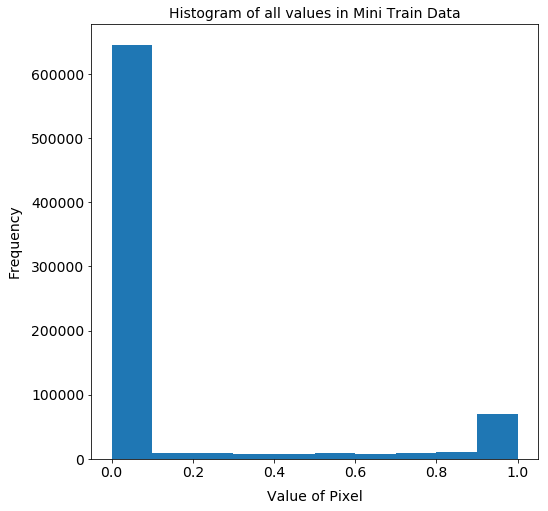

In [367]:
plt.figure(figsize=(8,8))
plt.hist(mini_train_data.flatten())
plt.title('Histogram of all values in Mini Train Data', size = 14)
plt.ylabel('Frequency', size = 14, labelpad = 10)
plt.xlabel('Value of Pixel', size = 14, labelpad = 10)
plt.xticks (fontsize = 14)
plt.yticks(fontsize=14)


In [386]:
def P9():

### STUDENT END ###

    #normal Gaussian Naive Bayes
    model = GaussianNB()
    model.fit(mini_train_data, mini_train_labels)
    print("Gaussian Naive Bayes model with no adjustments, returns an accuracy of", '{:.2%}'.format(model.score(dev_data, dev_labels)))
    #Accuracy is 0.593


    sigmas = np.arange(0,1.05, 0.01)
    model_accuracy = np.zeros(sigmas.shape)
    for i in range(sigmas.shape[0]):
        model =GaussianNB()
        mini_train_data2 = mini_train_data + np.random.normal(0,sigmas[i], (1000,784))
        dev_data2 = dev_data + np.random.normal(0,sigmas[i], (1000,784))
        model.fit(mini_train_data2, mini_train_labels)
        model_accuracy[i] = model.score(dev_data2, dev_labels)
    best_sigma= sigmas[model_accuracy.argmax()]
    print ("The value of sigma that results in the model with the highest accuracy,", '{:.2f}'.format(best_sigma), "\n"
           f"Gaussian Naive Bayes model with sigma  = {best_sigma}, returns an accuracy of:", '{:.2%}'.format(max(model_accuracy)))



### STUDENT END ###

P9()

Gaussian Naive Bayes model with no adjustments, returns an accuracy of 55.00%
The value of sigma that results in the model with the highest accuracy, 0.21 
Gaussian Naive Bayes model with sigma  = 0.21, returns an accuracy of: 81.30%


ANSWER: 
We created a histogram of all the values of pixels in our training set. The data appears very close to being binary, with the majority of data points near 0 or 1. For this reason using a normal approximation does not do a good job of predicting classes. For the same reason, the Bernoulli model performs very well, because it models the underlying distribution of pixel values very closely (majority of pixels are either very close to 0 or 1). If we add noise to the training data and development data to make the data appear more normal, this should improve our accuracy with using a Gaussian distribution. We picked the sigma that returns the highest accuracy on the development data (although this may lead to over-fitting). To be certain of this, we would need to test this on our test data (which is not explicitly shown above). Based on our analysis when sigma = 0.21, the model returned the largest accuracy on the development data set, with an accuracy of 81.30%


### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

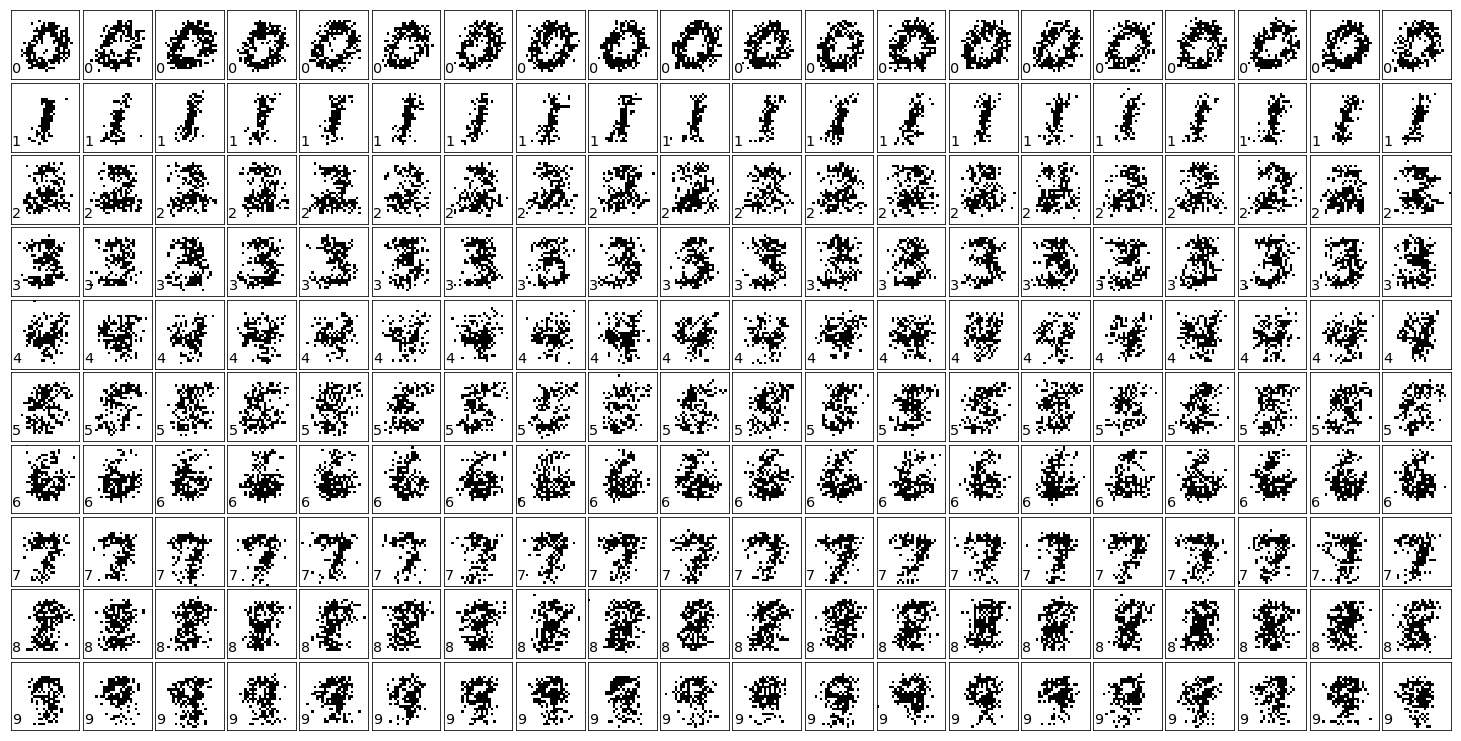

In [387]:
def P10(num_examples):

### STUDENT START ###
    model = BernoulliNB(binarize=.10)
    model.fit(train_data, train_labels)

    #set the overall canvas for all of our subplots
    fig = plt.figure(figsize = (20, 10))

    #set plot features for each subplot, particularly the spacing between the plots with hspace and wspace, and then 
    #where we want to set the corners for each subplot.
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


    for j in range (10):
        #there are ten digits and we're filtering on each 1 by 1.
        digit_prob = model.feature_log_prob_[j]
        for i in range(num_examples):
            #convert log back to probabilitity and compare to random number from uniform distribution for each pixel. if prob
            # of pixel is greater than randomly defined threshold for the pixel, return 1, else 0.  
            digit_pic = np.where(np.exp(digit_prob) > np.random.rand(digit_prob.shape[0]), 1,0)
            axes = fig.add_subplot(10,num_examples, (i+1)+num_examples*j, xticks=[], yticks=[])
            axes.imshow(digit_pic.reshape(28,28), cmap='gray_r')
        #Add the text of the digit  at the bottom left of each subplot for additional clarity
            axes.text(0, 25, str(j), color='black', fontsize = 'x-large')


### STUDENT END ###

P10(20)

ANSWER: The generated images appear to be more blurry than the test images, but they still maintain the general pattern of the digit. And this intuitively makes sense, given that we've introduced randomness from a uniform distribution as to whether a certain pixel should be colored or not based on it's current value.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Set LaPlace smoothing (alpha) to the optimal value (from part 8).
* Set binarization threshold to 0.
* Train on the mini train set.
* Evaluate perfromance on the dev set.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [388]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    model = BernoulliNB(alpha = 0.1, binarize = 0)
    model.fit(mini_train_data, mini_train_labels)
    post_probabilities = model.predict_proba(dev_data)
    for i in range(len(post_probabilities)):
        #highest probability for each class in dev_data
        max_prob = max(post_probabilities[i])
        bucket_index = np.argmax(buckets >= max_prob)
        #Add one to bucket in first instance where max probability is greater than lower limit of bucket 
        total[bucket_index] +=1
        #if prediction is correct, add 1 to bucket 
        if str(post_probabilities[i].argmax()) == dev_labels[i]:
            correct[bucket_index] +=1

                
### STUDENT END ###


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   1    accuracy = 1.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  23    accuracy = 0.348
p(pred) is 0.9000000000000 to 0.9990000000000    total =  58    accuracy = 0.431
p(pred) is 0.9990000000000 to 0.9999900000000    total =  54    accuracy = 0.444
p(pred) is 0.9999900000000 to 0.9999999000000    total =  55    accuracy = 0.600
p(pred) is 0.9999999000000 to 0.9999999990000    total =  67    accuracy = 0.627
p(pred) is 0.9999999990000 to 0.9999999999900    total =  51    accuracy = 0.765
p(pred) is 0.9999999999900 to 0.9999999999999    total =  51    accuracy = 0.745
p(pred) is 0.9999999999999 to 1.0000000000000    total = 640    accuracy = 0.955


ANSWER: Based on our results above, and using an alpha = 0.1, it appears there is a slight positive correlation between posterior probability and accuracy, except for the second to last bucket and the 1st bucket. The accuracy decreases from 76.5% to 74.5% when we move from bucket 7 to 8, but for all other buckets, the accuracy increases. The accuracy decreases from the 1st to the second bucket, from 100% to 34.8%. Some of this variation could just be due to the sample size in each bucket. For example, there are only 51 digits in buckets 7 and 8, and due to this small sample size, this can lead to fluctuations in accuracy which may not correspond to the posterior probabilities. This is even more evident in bucket 1, where the accuracy from our model is from 0-0.5, yet the actual accuracy predicted was 100%. This is because there was only one digit that fell within this range; as such we cannot put too much credibility on the calibration of the first bucket.

However, at the same time, the accuracies do not completely align with the probabilities estimated, which can also be due to small sample size for some of the buckets. For example, the probability of a prediction between 0.5-0.9, resulted in an accuracy of only 34.8%. However, the bucket size for this group included only 23 predictions. As we reach a probability of 1, the accuracy in each bucket increases, except for buckets 7 and 8, as noted earlier. The accuracy reaches a high of 95.5% in the final bucket, but it is less than the predicted accuracy of 0.9999999999999 to 1.0 for the digits. Although this is the highest accuracy, it does not match the posterior probability predicted completely. Since accuracy does not monotonically increase as we improve the posterior probabilities (weak positive correlation), and because the posterior probabilities do not align with the actual accuracy, we can classify this Naive Bayes model as a poorly calibrated model. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [0]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()